# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pandas.errors import EmptyDataError 

from datetime import datetime, date
from scipy.cluster.hierarchy import dendrogram, linkage



import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df=pd.read_csv("C:/Users/HP/Downloads/Lab 4 - Unsu[ervised learinng (1)/marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

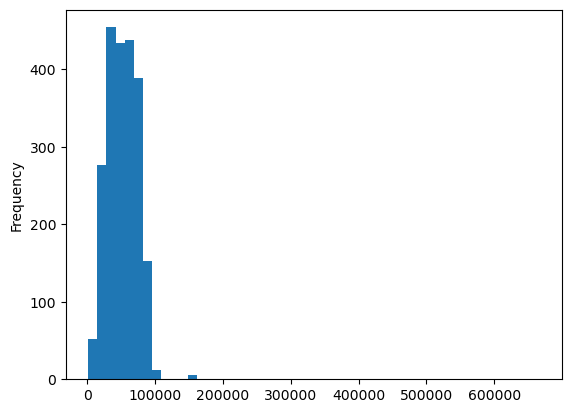

In [6]:
df["Income"].plot(kind="hist",bins=50)

<AxesSubplot:>

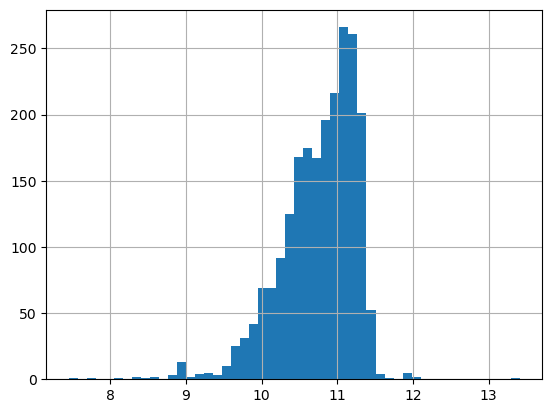

In [7]:
df["Income"] = np.log(df["Income"])
df["Income"].hist(bins=50)

<AxesSubplot:>

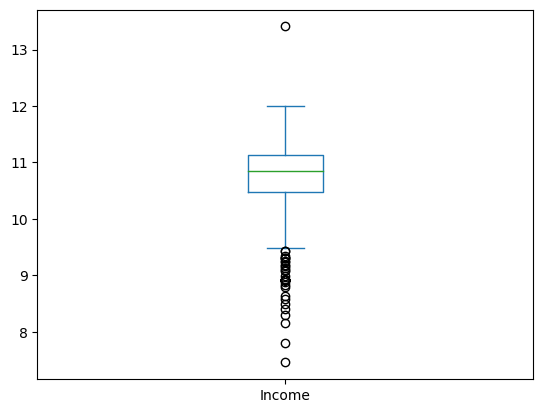

In [8]:
df["Income"].plot(kind="box")

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

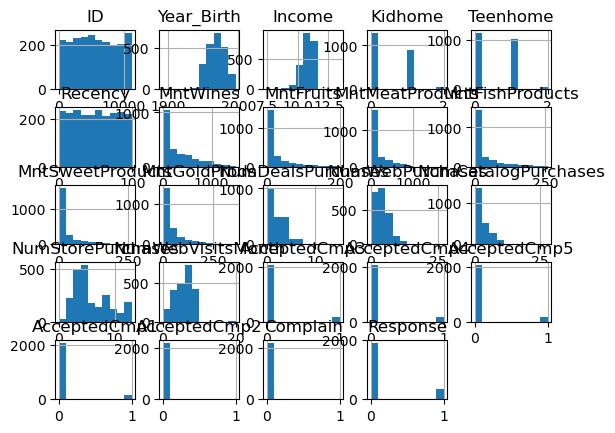

In [9]:
df.hist()

In [10]:
#It shows that some variables take on only a single value.

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [11]:
df.isnull().sum()/100

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 0.24
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Response               0.00
dtype: float64

In [12]:
df['Income']=df['Income'].fillna(df['Income'].mean())

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [13]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [14]:
# as we can see there are no duplicated values in the data set

### 5. Drop the columns which you think redundant for the analysis 

In [15]:
df.drop(columns = ['ID','Dt_Customer'],inplace=True)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
df["Marital_Status"] = df["Marital_Status"].replace(["Divorced","Widow","YOLO", "Alone", "Absurd"], "Single")
df.select_dtypes("object").value_counts()

Education   Marital_Status
Graduation  Married           433
            Single            408
            Together          286
PhD         Married           192
            Single            177
Master      Married           138
            Single            126
PhD         Together          117
Master      Together          106
2n Cycle    Married            81
            Single             65
            Together           57
Basic       Married            20
            Single             20
            Together           14
dtype: int64

In [18]:
df["Marital_Status"] = df["Marital_Status"].replace(['Married', 'Together' ], "Relationship")
df.select_dtypes("object").value_counts()

Education   Marital_Status
Graduation  Relationship      719
            Single            408
PhD         Relationship      309
Master      Relationship      244
PhD         Single            177
2n Cycle    Relationship      138
Master      Single            126
2n Cycle    Single             65
Basic       Relationship       34
            Single             20
dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [19]:
df["Total_Expense"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
                                    "MntGoldProds"]].sum(axis=1)

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [20]:
df["Num_Total_Purchases"] = df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",'NumDealsPurchases']].sum(axis=1)


In [21]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expense,Num_Total_Purchases
0,1957,Graduation,Single,10.970575,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,1617,25
1,1954,Graduation,Single,10.743847,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,27,6
2,1965,Graduation,Relationship,11.179032,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,776,21
3,1984,Graduation,Relationship,10.190394,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,53,8
4,1981,PhD,Relationship,10.973237,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,11.022278,0,1,46,709,43,182,...,5,0,0,0,0,0,0,0,1341,18
2236,1946,PhD,Relationship,11.066857,2,1,56,406,0,30,...,7,0,0,0,1,0,0,0,444,22
2237,1981,Graduation,Single,10.950473,0,0,91,908,48,217,...,6,0,1,0,0,0,0,0,1241,19
2238,1956,Master,Relationship,11.145406,0,1,8,428,30,214,...,3,0,0,0,0,0,0,0,843,23


In [22]:
df.drop(columns = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"],inplace=True)

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [23]:
df["Kids"] = df["Kidhome"] + df["Teenhome"]

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [24]:
df["TotalAcceptedCmp"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]].sum(axis=1)

### 11. Drop those columns which we have used above for obtaining new features

In [25]:
df.drop(columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Kidhome",
"Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts",
                                    "MntGoldProds"],inplace=True)

In [26]:
df.drop(columns = ["Complain"],inplace=True)

In [27]:
df.drop(columns = ["NumDealsPurchases","NumWebVisitsMonth"],inplace=True)

In [28]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,Response,Total_Expense,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,10.970575,58,1,1617,25,0,0
1,1954,Graduation,Single,10.743847,38,0,27,6,2,0
2,1965,Graduation,Relationship,11.179032,26,0,776,21,0,0
3,1984,Graduation,Relationship,10.190394,26,0,53,8,1,0
4,1981,PhD,Relationship,10.973237,94,0,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,11.022278,46,0,1341,18,1,0
2236,1946,PhD,Relationship,11.066857,56,0,444,22,3,1
2237,1981,Graduation,Single,10.950473,91,0,1241,19,0,1
2238,1956,Master,Relationship,11.145406,8,0,843,23,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [29]:
df["Age"]=2022-df["Year_Birth"]
df.drop(columns = ["Year_Birth"],inplace=True)

### 13. Encode the categorical variables in the dataset

In [30]:
#label encoding 
cate=['Education','Marital_Status']
le=LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(le.fit_transform)



### 14. Standardize the columns, so that values are in a particular range


In [31]:
ss=StandardScaler()
df1=df.copy()
scaled_features=ss.fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df1.index,columns=df1.columns)

In [32]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,Response,Total_Expense,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,1.346874,0.430938,0.307039,2.388846,1.679417,1.320826,-1.264505,-0.439037,0.985345
1,-0.350141,1.346874,-0.019784,-0.383664,-0.418612,-0.961275,-1.154596,1.396361,-0.439037,1.235733
2,-0.350141,-0.742460,0.845339,-0.798086,-0.418612,0.282673,0.799685,-1.264505,-0.439037,0.317643
3,-0.350141,-0.742460,-1.120018,-0.798086,-0.418612,-0.918094,-0.894025,0.065928,-0.439037,-1.268149
4,1.428354,-0.742460,0.436231,1.550305,-0.418612,-0.305254,0.539114,0.065928,-0.439037,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [33]:
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663e+00,  1.37540339e-02,  1.67507600e-01,
        -1.17336854e-02,  9.08600553e-02,  9.20951775e-02,
         9.40543885e-02,  5.32130438e-02,  3.53512102e-02,
         1.71466853e-01],
       [ 1.37540339e-02,  1.00044663e+00, -2.86835727e-03,
         4.50971948e-03,  1.50142261e-01,  1.77523234e-02,
        -6.71036864e-03, -3.91759832e-02, -3.19398267e-05,
         4.23840181e-03],
       [ 1.67507600e-01, -2.86835727e-03,  1.00044663e+00,
         5.88423323e-03,  1.27169543e-01,  6.93828887e-01,
         6.23656902e-01, -2.38433859e-01,  2.98614602e-01,
         2.26390640e-01],
       [-1.17336854e-02,  4.50971948e-03,  5.88423323e-03,
         1.00044663e+00, -1.98525274e-01,  2.04417334e-02,
         5.74294350e-03,  1.80614498e-02, -1.25753269e-02,
         1.98799637e-02],
       [ 9.08600553e-02,  1.50142261e-01,  1.27169543e-01,
        -1.98525274e-01,  1.00044663e+00,  2.65416499e-01,
         1.55207385e-01, -1.69239013e-01,  4.26225468e-01,
        -2.

In [34]:
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigein Vals:','\n',eig_vals)
print('\n')
print("eigein vectors: ",'\n',eig_vectors)

eigein Vals: 
 [2.98668647 1.37513357 0.15941326 1.19031461 0.36506233 0.50562748
 0.69876741 0.81363473 0.9025688  1.00725762]


eigein vectors:  
 [[-1.04412493e-01 -2.80693234e-01 -6.23617702e-03  5.47894851e-01
  -9.44051837e-02 -7.26741103e-02 -6.70909109e-02 -6.75840396e-01
  -3.66905341e-01 -2.61864717e-03]
 [-2.78490558e-02  2.09436883e-01 -6.45478727e-03  2.78099586e-01
  -4.10278651e-02 -1.97404462e-01  1.06802055e-01 -3.74401652e-02
   3.68108794e-01 -8.30069420e-01]
 [-4.56543777e-01 -2.62060996e-01 -2.13116137e-01 -1.77174801e-02
   7.68321533e-01 -1.37744807e-01  2.27215352e-01 -1.55390313e-02
   1.24063453e-01  2.46533790e-02]
 [ 2.05198261e-02 -3.08420479e-01 -2.79785471e-02 -4.03560219e-01
   5.61743621e-02  2.41887320e-01 -1.82296125e-02  9.72297897e-02
  -6.06252588e-01 -5.49380478e-01]
 [-2.43776498e-01  4.90696469e-01 -2.07234616e-02  4.05076264e-01
   1.78859357e-01  6.47315252e-01  9.75696052e-03  1.87210545e-01
  -2.21636872e-01 -3.98228749e-04]
 [-5.33905309e-0

In [35]:
total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted (eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Explained Variance : ",var_exp)
print('Cummulative Variance Explained :',cum_var_exp)

Explained Variance :  [29.853531260539174, 13.745196706100998, 11.89783219055051, 10.068079539595043, 9.021658675768414, 8.132714953007165, 6.984554568668898, 5.054017548794325, 3.64899359574727, 1.5934209612282078]
Cummulative Variance Explained : [ 29.85353126  43.59872797  55.49656016  65.5646397   74.58629837
  82.71901333  89.70356789  94.75758544  98.40657904 100.        ]


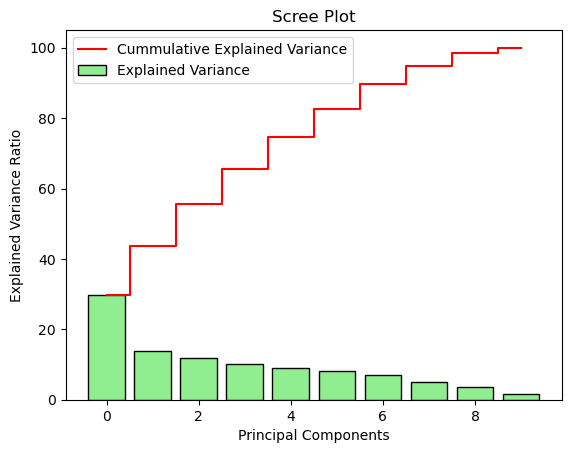

In [36]:
plt.bar(range(10),var_exp,align="center",color="lightgreen",edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [37]:
pca=PCA(n_components=8)

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.622850,0.713242,0.541703,1.394117,-0.819360,0.492523,0.661315,-2.024949
1,-1.580178,-0.558982,1.339939,0.903455,-0.859778,1.109409,-0.068473,0.648847
2,1.030029,-0.373671,-0.724005,-0.983403,-1.118840,-0.336267,0.663792,-0.120678
3,-1.871831,0.977276,-0.481658,-1.039111,-0.094541,-0.598754,-0.105377,0.137790
4,-0.006839,-1.106559,-0.624173,0.192986,1.442132,-1.504643,-0.660895,-0.465199


In [38]:
cluster_errors=[]
cluster_range=range(2,15)
for num_cluster in cluster_range:
    cluster=KMeans(num_cluster,random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

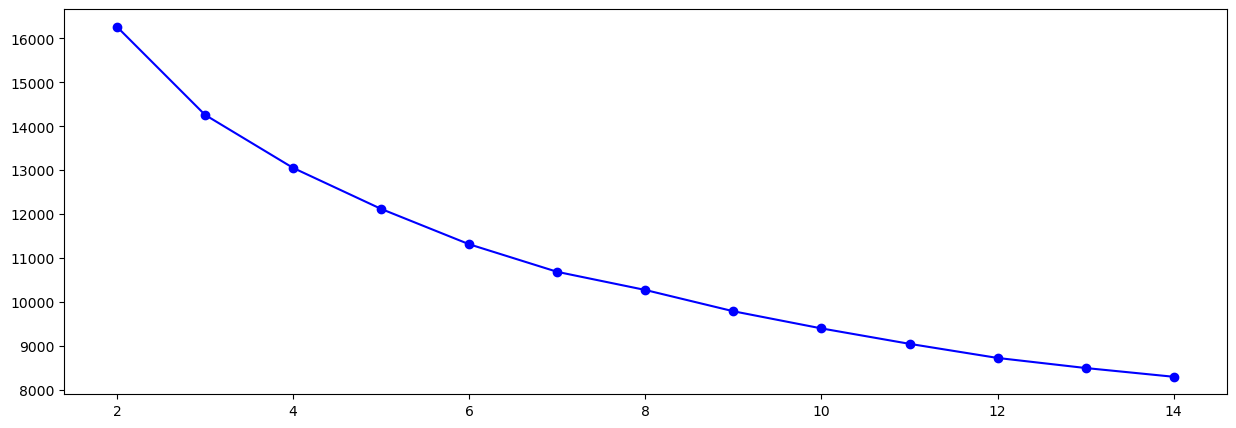

In [39]:
cluster_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_errors':cluster_errors})

#Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_cluster'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [40]:
# Appliying KMeans clustering for the optimal number of clusters abtained above

kmeans=KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [41]:
#creating a dataframe of the labels.

label=pd.DataFrame(kmeans.labels_,columns=['Label'])

In [42]:
# joining the label dataframe to the pca_df dataFrame.

kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.622850,0.713242,0.541703,1.394117,-0.819360,0.492523,0.661315,-2.024949,2
1,-1.580178,-0.558982,1.339939,0.903455,-0.859778,1.109409,-0.068473,0.648847,1
2,1.030029,-0.373671,-0.724005,-0.983403,-1.118840,-0.336267,0.663792,-0.120678,0
3,-1.871831,0.977276,-0.481658,-1.039111,-0.094541,-0.598754,-0.105377,0.137790,1
4,-0.006839,-1.106559,-0.624173,0.192986,1.442132,-1.504643,-0.660895,-0.465199,0


In [43]:
kmeans_df['Label'].value_counts()

1    1117
0     860
2     263
Name: Label, dtype: int64

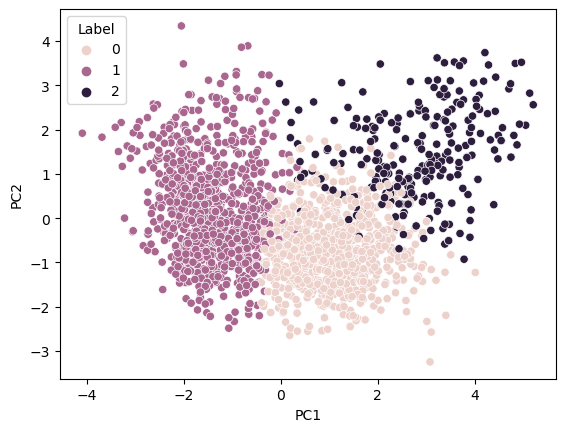

In [44]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

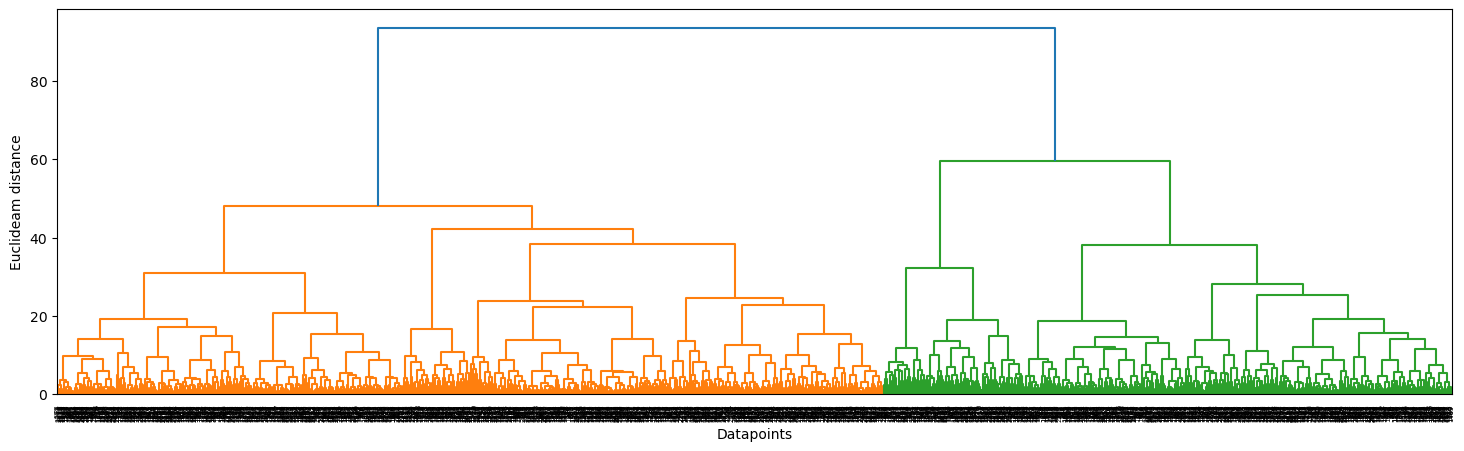

In [45]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclideam distance')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [47]:
for i in range(2,15):
    hier=AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df)
    labels=hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.18984507414237467
3 0.17395599881451979
4 0.10394915296842275
5 0.11834670446171724
6 0.12292448198485324
7 0.1271013580452219
8 0.12955799987434627
9 0.10537229984716674
10 0.10794638670064412
11 0.11257097663989814
12 0.1183022029913184
13 0.12239926747619866
14 0.12023642389055296


In [48]:
hie_cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',
                                   linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [49]:
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['labels'])
df_label1.head(5)

,labels
0,0
1,1
2,0
3,1
4,1


In [50]:
df_hier=df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Response,Total_Expense,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,labels
0,2,1,10.970575,58,1,1617,25,0,0,65,0
1,2,1,10.743847,38,0,27,6,2,0,68,1
2,2,0,11.179032,26,0,776,21,0,0,57,0
3,2,0,10.190394,26,0,53,8,1,0,38,1
4,4,0,10.973237,94,0,422,19,1,0,41,1


### Visualization and Interpretation of results

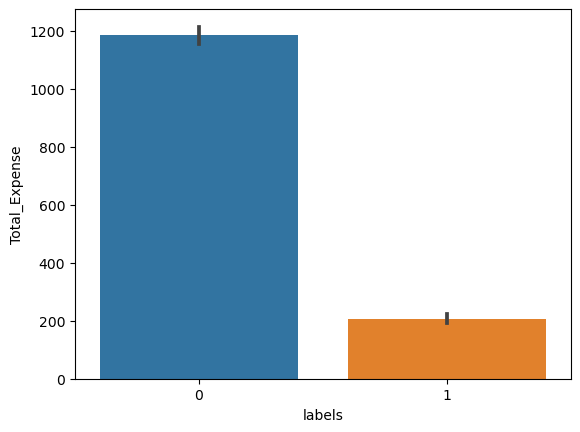

In [51]:
sns.barplot(df_hier['labels'],df_hier['Total_Expense'])
plt.show()

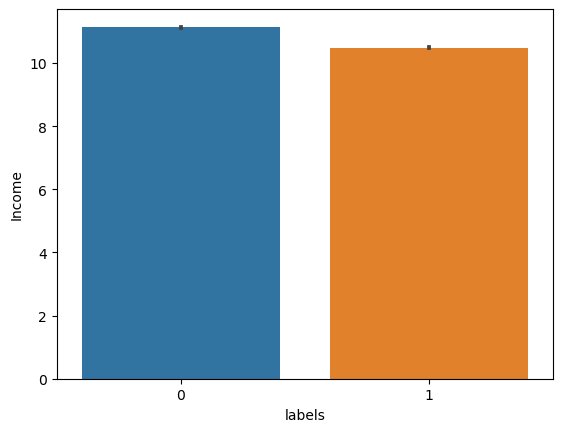

In [52]:
sns.barplot(df_hier['labels'],df_hier['Income'])
plt.show()

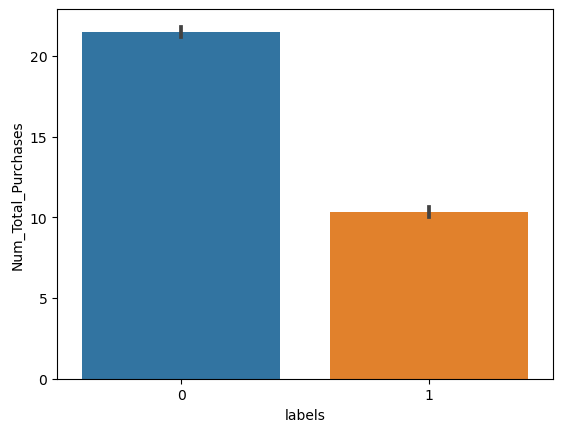

In [53]:
sns.barplot(df_hier['labels'],df_hier['Num_Total_Purchases'])
plt.show()

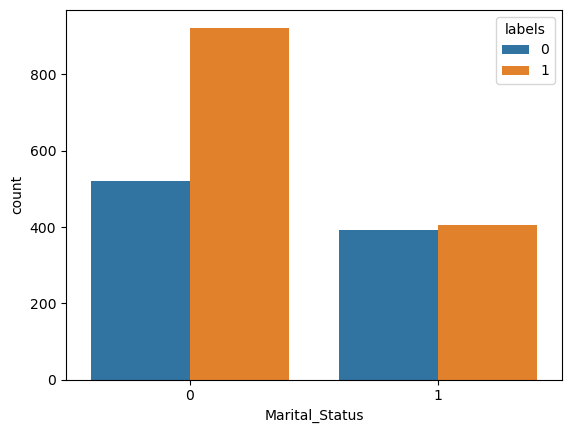

In [56]:
sns.countplot(df_hier['Marital_Status'],hue='labels',data=df_hier)
plt.show()

-----
## Happy Learning
-----